Processing Year: Photos_2016, Month: April16


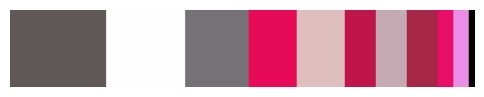

Processing Year: Photos_2016, Month: Aug16


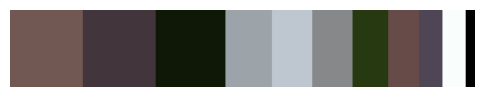

Processing Year: Photos_2016, Month: Dec16


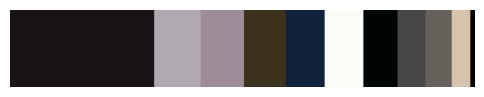

Processing Year: Photos_2016, Month: Feb16


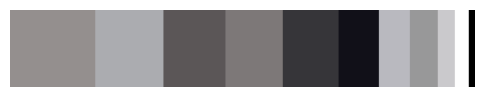

Processing Year: Photos_2016, Month: Jan16


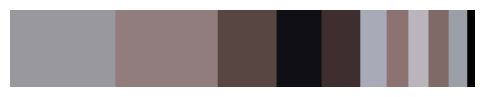

Processing Year: Photos_2016, Month: July16


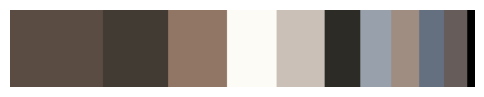

Processing Year: Photos_2016, Month: June16


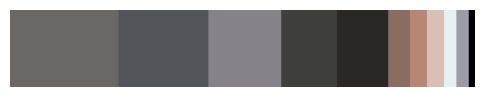

Processing Year: Photos_2016, Month: March16


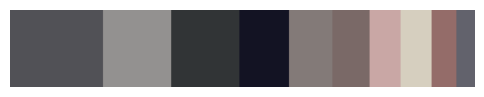

Processing Year: Photos_2016, Month: May16


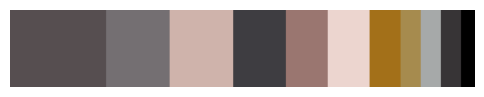

Processing Year: Photos_2016, Month: Nov16


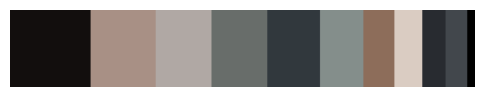

Processing Year: Photos_2016, Month: Oct16


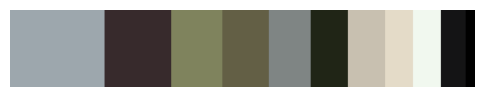

Processing Year: Photos_2016, Month: Sep16


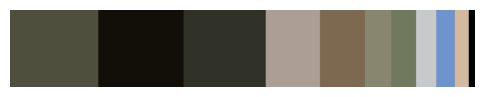

Processing Year: Photos_2017, Month: April17


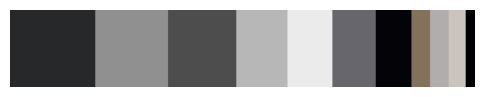

Processing Year: Photos_2017, Month: Aug17


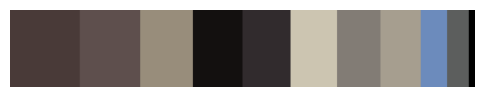

Processing Year: Photos_2017, Month: Dec17


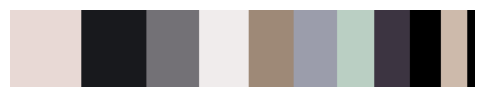

Processing Year: Photos_2017, Month: Feb17


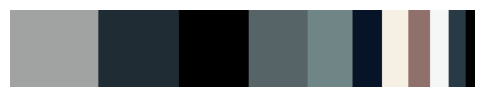

Processing Year: Photos_2017, Month: Jan17


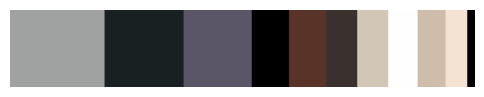

Processing Year: Photos_2017, Month: July17


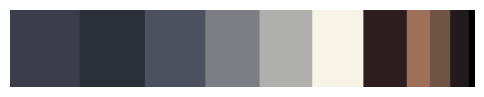

Processing Year: Photos_2017, Month: June17
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2017\June17\IMG_20170605_163423-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2017\June17\IMG_20170607_175708-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2017\June17\IMG_20170611_165800-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2017\June17\IMG_20170615_150534-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2017\June17\IMG_20170618_185125-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2017\June17\IMG_20170625_180940-EFFECTS-düzenlendi.jpg


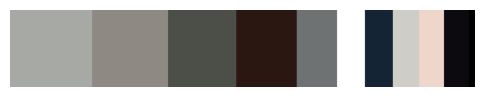

Processing Year: Photos_2017, Month: March17


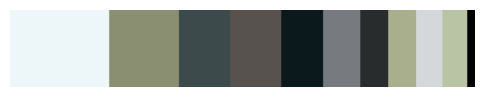

Processing Year: Photos_2017, Month: May17
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2017\May17\IMG_20170525_062419-EFFECTS-düzenlendi.jpg


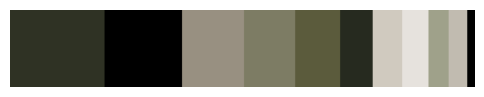

Processing Year: Photos_2017, Month: Nov17


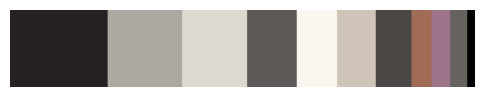

Processing Year: Photos_2017, Month: Oct17


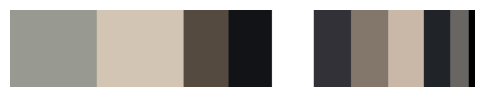

Processing Year: Photos_2017, Month: Sep17


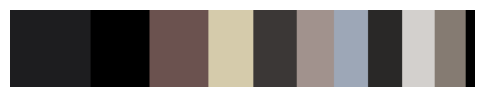

Processing Year: Photos_2018, Month: April18


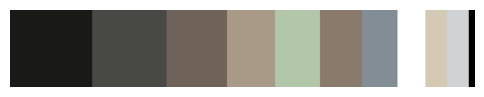

Processing Year: Photos_2018, Month: Aug18
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180811_101308_1-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180811_101539-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180817_181224_1-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180817_190508-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180817_200317_1-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180818_101138-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180819_102826_1-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180820_111044_1-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Aug18\IMG_20180821_123057_1-EFFEC

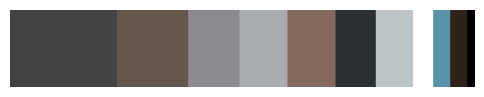

Processing Year: Photos_2018, Month: Dec18


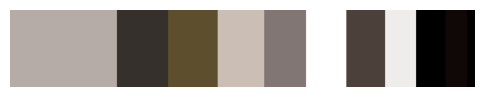

Processing Year: Photos_2018, Month: Feb18


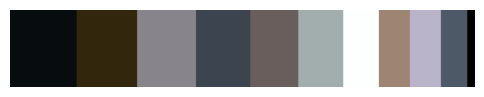

Processing Year: Photos_2018, Month: Jan18
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Jan18\IMG_20180124_172009-EFFECTS-düzenlendi.jpg


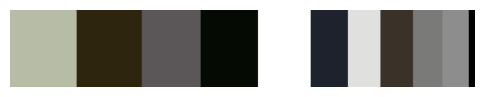

Processing Year: Photos_2018, Month: July18
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\July18\IMG_20180715_171735_2-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\July18\IMG_20180722_142323_1-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\July18\IMG_20180730_083146_1-EFFECTS-düzenlendi.jpg


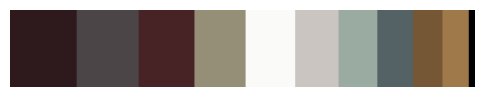

Processing Year: Photos_2018, Month: June18
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\June18\IMG_20180623_152237_1-EFFECTS-düzenlendi.jpg


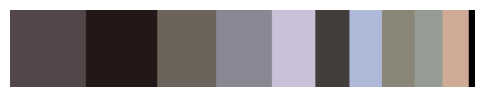

Processing Year: Photos_2018, Month: March18
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\March18\IMG_20180301_081550-EFFECTS-düzenlendi.jpg


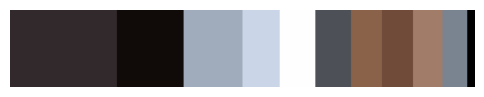

Processing Year: Photos_2018, Month: May18
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\May18\IMG_20180511_112354_1-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\May18\IMG_20180511_113624_1-EFFECTS-düzenlendi.jpg


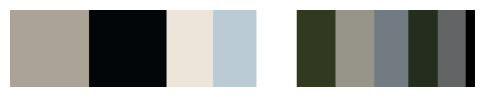

Processing Year: Photos_2018, Month: Nov18


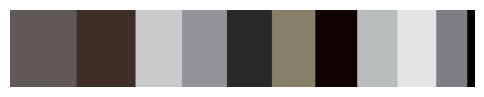

Processing Year: Photos_2018, Month: Oct18


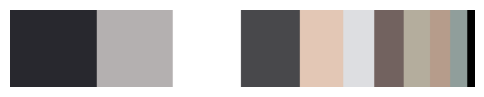

Processing Year: Photos_2018, Month: Sep18
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Sep18\IMG_20180904_195535_1-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Sep18\IMG_20180909_145619-EFFECTS-düzenlendi.jpg
Failed to read image: C:\Users\Lenovo\Desktop\Photos_2018\Sep18\IMG_20180923_140136-EFFECTS-düzenlendi.jpg


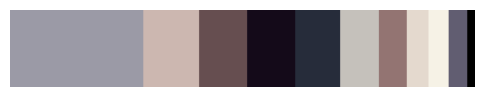

Processing Year: Photos_2019, Month: April19


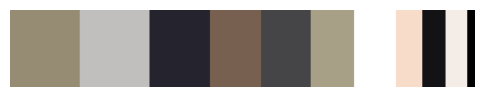

Processing Year: Photos_2019, Month: Aug19


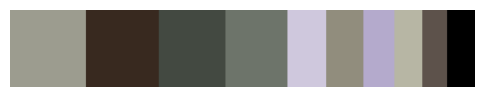

Processing Year: Photos_2019, Month: Dec19


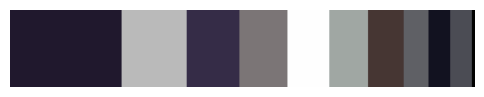

Processing Year: Photos_2019, Month: Feb19


KeyboardInterrupt: 

In [29]:
import cv2
import numpy as np
import os
from sklearn.cluster import MiniBatchKMeans  # Faster version of KMeans
from collections import Counter
import matplotlib.pyplot as plt
import json
from PIL import Image

def get_dominant_colors(pil_img, palette_size=16, num_colors=10):
    """Get dominant colors from a PIL image using adaptive palette."""
    # Resize image to speed up processing
    img = pil_img.copy()
    img.thumbnail((100, 100))

    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)

    dominant_colors = []
    for i in range(min(num_colors, len(color_counts))):  # Ensure no out-of-bounds access
        palette_index = color_counts[i][1]
        dominant_colors.append(palette[palette_index * 3:palette_index * 3 + 3])

    return dominant_colors

def extract_dominant_colors(image, num_colors=7):
    """Extract dominant colors from an image using MiniBatchKMeans for faster processing."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape(-1, 3)
    kmeans = MiniBatchKMeans(n_clusters=num_colors, random_state=42, max_iter=100, batch_size=1000)
    kmeans.fit(image)
    return kmeans.cluster_centers_.astype(int)

def merge_similar_colors_in_counter(color_counter, threshold=30):
    """Merge similar colors in the color counter based on a distance threshold in RGB space."""
    merged_counter = Counter()
    colors = list(color_counter.keys())
    color_array = np.array(colors)
    for color, count in color_counter.items():
        found_similar = False
        dist = np.linalg.norm(color_array - np.array(color), axis=1)
        close_colors = np.where(dist < threshold)[0]
        if close_colors.size > 0:
            merged_color = tuple(color_array[close_colors[0]])
            merged_counter[merged_color] += count
            found_similar = True
        if not found_similar:
            merged_counter[color] = count
    return merged_counter

def process_image(image_path, num_colors=7, use_pil=False):
    """Process a single image to extract dominant colors and count their occurrences."""
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {image_path}")
            return []
        image = cv2.resize(image, (300, 300))  # Resize image to a standard size to speed up processing
        
        if use_pil:
            pil_image = Image.open(image_path)
            dominant_colors = get_dominant_colors(pil_image, num_colors=num_colors)
            return {tuple(color): 1 for color in dominant_colors}
        else:
            dominant_colors = extract_dominant_colors(image, num_colors)
            return {tuple(color): 1 for color in dominant_colors}
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return []

def process_images_in_folder(folder_path, num_colors=7, use_pil=False):
    """Process all images in a folder to extract and cluster dominant colors."""
    color_counter = Counter()
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            image_path = os.path.join(folder_path, file_name)
           
            image_colors = process_image(image_path, num_colors, use_pil)
            color_counter.update(image_colors)
    
    merged_counter = merge_similar_colors_in_counter(color_counter, threshold=30)
    return merged_counter

def display_color_summary(colors_with_counts):
    """Display a summary of colors according to their counts."""
    # Total number of pixels (for scaling purposes)
    total_count = sum(count for _, count in colors_with_counts)

    # Sort by count in descending order
    sorted_colors = sorted(colors_with_counts, key=lambda x: x[1], reverse=True)
    
    # Create the color bar with width based on the count
    color_bar = np.zeros((50, 300, 3), dtype='uint8')
    x_offset = 0  # Start position for drawing color bars

    for color, count in sorted_colors:
        # Calculate the width of the color block based on its count
        block_width = int((count / total_count) * 300)  # Scale width proportionally
        color_bar[:, x_offset:x_offset+block_width, :] = color
        x_offset += block_width
    
    # Display the color bar
    plt.figure(figsize=(6, 2))
    plt.axis("off")
    plt.imshow(color_bar)
    plt.show()

def process_year_and_month(base_path, num_colors=7, use_pil=False):
    """Process folders grouped by year and month."""
    results = {}
    for year_folder in os.listdir(base_path):
        year_path = os.path.join(base_path, year_folder)
        if os.path.isdir(year_path) and year_folder.startswith("Photos_20"):
            results[year_folder] = {}
            for month_folder in os.listdir(year_path):
                month_path = os.path.join(year_path, month_folder)
                if os.path.isdir(month_path) and month_folder.startswith(("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                                                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")):
                    print(f"Processing Year: {year_folder}, Month: {month_folder}")
                    month_colors = process_images_in_folder(month_path, num_colors, use_pil)
                    top_colors = month_colors.most_common(10)
                    results[year_folder][month_folder] = [(tuple(color), count) for color, count in top_colors]
                    # Display the top colors for the month
                    display_color_summary(top_colors)
    return results

def convert_numpy_ints(data):
    """Recursively convert numpy int64 values to native Python int."""
    if isinstance(data, dict):
        return {k: convert_numpy_ints(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [convert_numpy_ints(v) for v in data]
    elif isinstance(data, np.int64):
        return int(data)  # Convert numpy int64 to int
    else:
        return data

# Specify the base folder containing year and month folders
base_folder = r"C:\Users\Lenovo\Desktop"

# Process all folders and store the results
color_data = process_year_and_month(base_folder, num_colors=7, use_pil=True)

# Convert any numpy.int64 values to native Python int before saving
color_data = convert_numpy_ints(color_data)

# Save the results to a JSON file
with open("color_summary.json", "w") as f:
    json.dump(color_data, f, indent=4)
